<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install yfinance

In [8]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [130]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose

#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#import cufflinks as cf


In [11]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [146]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df.tail(2018)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
1,2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
3,2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
4,2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...,...
2013,2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2014,2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2015,2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813
2016,2020-01-08,297.160004,304.439911,297.156006,303.190002,299.284088,33090946


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2018 non-null   datetime64[ns]
 1   Open       2018 non-null   float64       
 2   High       2018 non-null   float64       
 3   Low        2018 non-null   float64       
 4   Close      2018 non-null   float64       
 5   Adj Close  2018 non-null   float64       
 6   Volume     2018 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.5 KB


In [ ]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

In [ ]:
start_date = datetime(2017,5,5)
end_date = datetime(2020,1,9)
lim_df = df[start_date:end_date]

In [154]:
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]

In [137]:
#df.head()

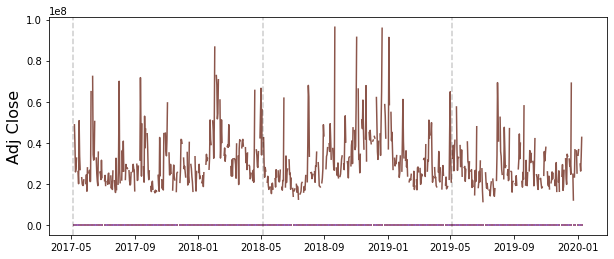

In [157]:
plt.figure(figsize=(10,4))
#plt.plot(lim_df)
plt.plot(test_data)
#plt.title('Adj Close in 2018 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)

In [109]:
first_diff = lim_df.diff()[1:]

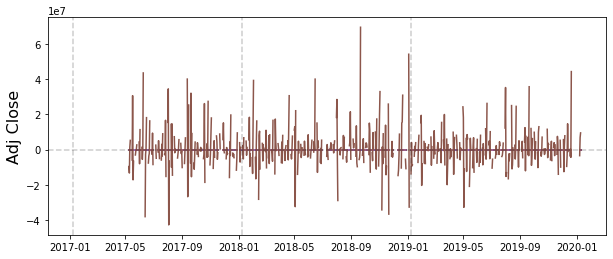

In [112]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 763 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-09'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [114]:
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


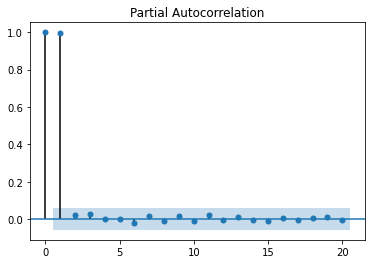

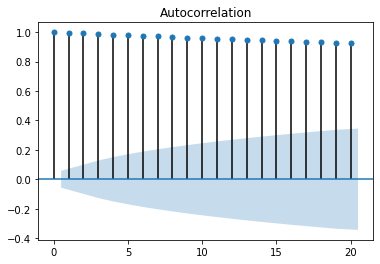

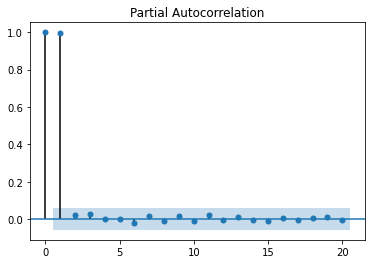

In [115]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['Adj Close'], lags=20, alpha=0.01)
plot_pacf(df['Adj Close'], lags=20, alpha=0.01)

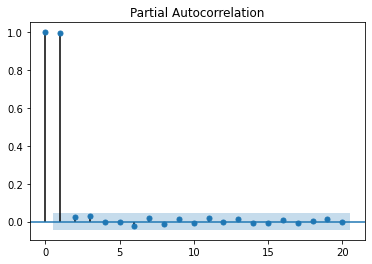

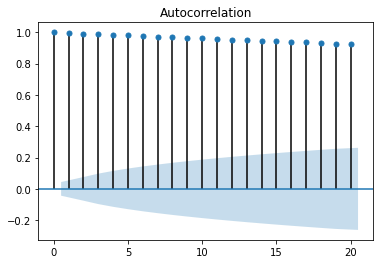

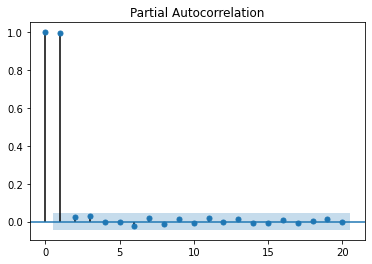

In [116]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df['Adj Close'], lags=20, alpha=0.05)
plot_pacf(df['Adj Close'], lags=20, alpha=0.05)

In [117]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
print(acf(df['Adj Close']))
print(pacf(df['Adj Close']))

[1.         0.9956487  0.99149248 0.98758206 0.98366395 0.97975613
 0.97570707 0.97183297 0.96789123 0.96407037 0.96020074 0.95650113
 0.95280389 0.94921308 0.94560588 0.94192528 0.93832949 0.9346995
 0.93112438 0.9276528  0.92415682 0.92071207 0.91726048 0.91372926
 0.91032637 0.90708868 0.903928   0.90062629 0.89726286 0.8937654
 0.89047307 0.88707798 0.8838807  0.8806654  0.87734206 0.87390261
 0.87046192 0.86710578 0.86391883 0.86068785 0.8574928 ]
[ 1.00000000e+00  9.96142332e-01  2.29284579e-02  3.02865794e-02
 -1.56823905e-03  1.42477609e-04 -2.05661480e-02  1.97028528e-02
 -1.10939713e-02  1.45592252e-02 -8.42800031e-03  2.12013999e-02
 -1.99679050e-03  1.42178537e-02 -4.56571877e-03 -9.71149663e-03
  6.94321927e-03 -5.20404696e-03  4.41179236e-03  1.30701825e-02
 -4.36892939e-03  5.73512298e-03 -2.28870660e-03 -1.22113445e-02
  1.44163918e-02  2.01429516e-02  1.04322871e-02 -1.82820931e-02
 -9.65742649e-03 -2.15089256e-02  2.36991296e-02 -1.47815369e-02
  2.64245152e-02 -4.637

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



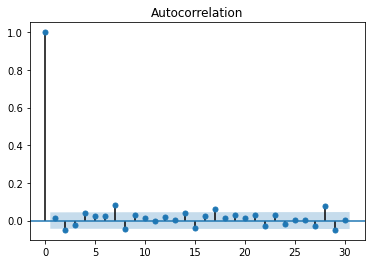

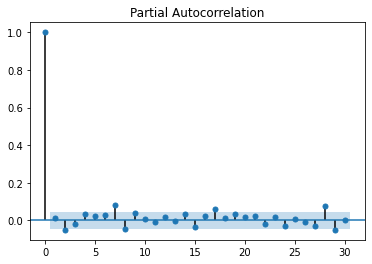

In [69]:
from statsmodels.tsa.stattools import pacf

#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df

#plot ACF
#plot_acf(test_data, lags=30)
plot_acf(data_df['Adj Close'], lags= 30)

#plot the PACF
#plot_pacf(data_df['Adj Close'], lags=30)
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

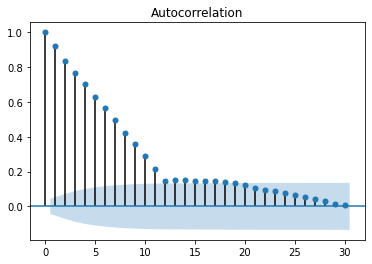

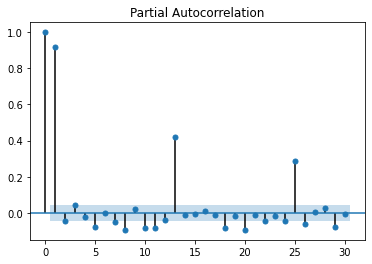

In [118]:
from statsmodels.tsa.stattools import pacf

#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
plot_acf(data_df['Adj Close'], lags= 30)

#plot PACF
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

In [119]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], order=(1,1,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                 2018
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4324.126
Date:                            Tue, 18 Jan 2022   AIC                           8658.252
Time:                                    15:05:00   BIC                           8686.234
Sample:                                         0   HQIC                          8668.528
                                           - 2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8431      0.150     -5.635      0.000      -1.136      -0.550
ma.L1          0.8602      0.142   

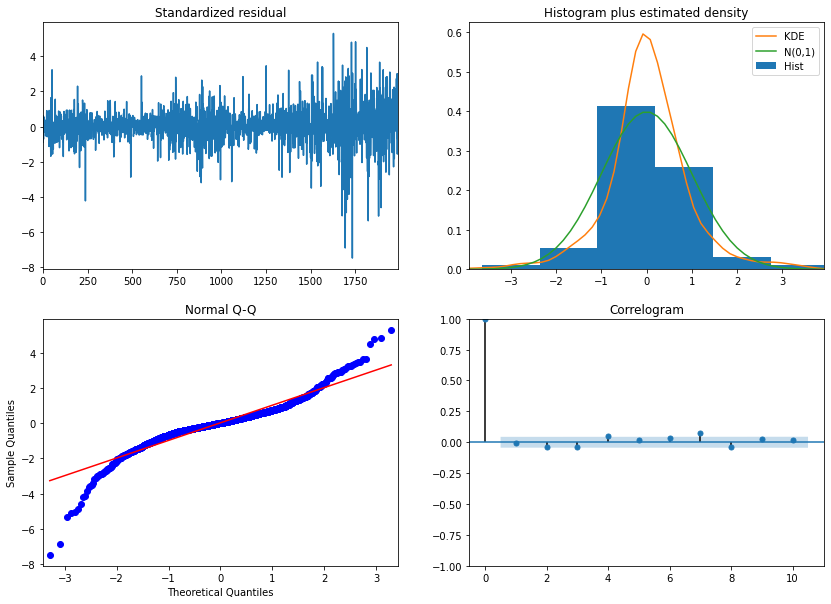

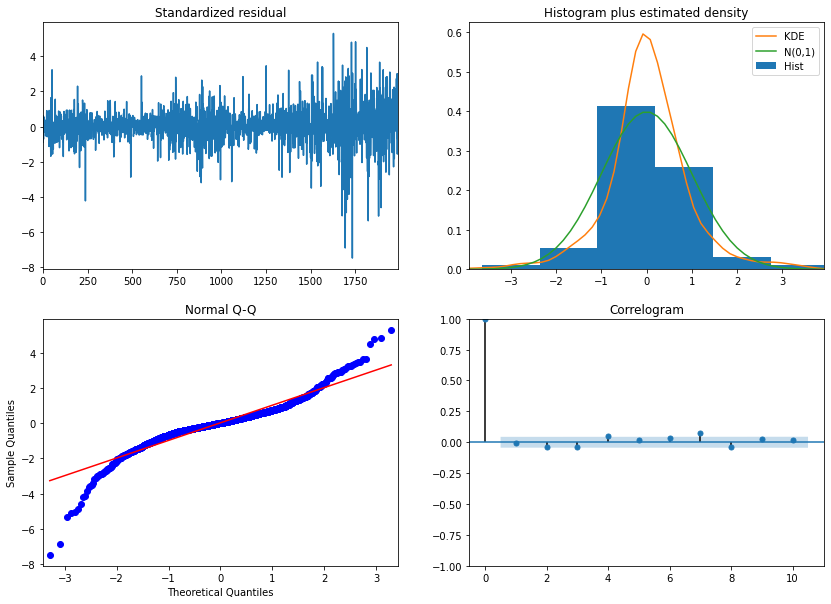

In [72]:
results.plot_diagnostics(figsize=(14,10))

In [125]:
# Forcast 50 steps ahead
forecast_values = results.get_forecast(steps= 50)

# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

In [121]:
# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)

#Prediction summary
forecast_values.summary_frame()

Adj Close,mean,mean_se,mean_ci_lower,mean_ci_upper
2018,305.738872,2.105057,301.613037,309.864707
2019,306.343387,3.002636,300.458330,312.228445
2020,306.217348,3.670282,299.023728,313.410967
2021,306.147916,4.246775,297.824391,314.471441
2022,306.809126,4.744181,297.510702,316.107550
2023,307.152674,5.201624,296.957679,317.347669
2024,307.553352,5.616152,296.545896,318.560807
2025,307.780401,6.006705,296.007474,319.553327
2026,307.900719,6.369726,295.416286,320.385152
2027,307.827817,6.716059,294.664584,320.991050


In [205]:
#Prediction
model_predict = forecast_values.predicted_mean

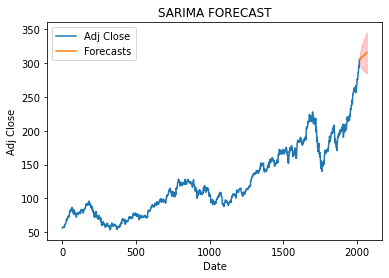

In [206]:
#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)

#plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)

#Axes labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
y_forecasted = forecast_values.predicted_mean
#y_truth = y['2018-06-01':]
#y_truth = train_data
y_truth = lim_df[train_end:test_end]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [210]:
mape = np.mean(np.abs(np.array(model_predict[:-979]) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

ValueError: ignored

In [213]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_data, model_predict[:-979])
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

ValueError: ignored